# Support Vector Machines

COSI/ECON-148B-1 : Introduction to Machine Learning with Economic Applications

Prepared by Pengyu Hong and Zizhang Chen

### 0. Load datasets

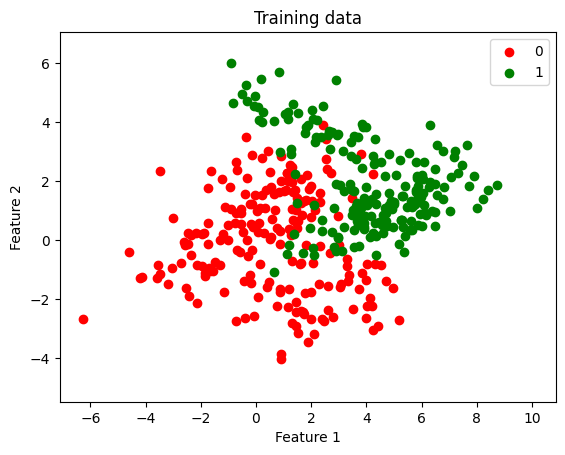

,Feature1,Feature2
0,0.617177,4.168962
1,0.377053,1.807461
2,3.029269,2.757374
3,1.237964,2.606808
4,-2.064040,2.837974
...,...,...
995,3.328496,3.464104
996,3.676936,0.931596
997,0.307656,5.692103
998,1.614047,4.422684


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

data_train = pd.read_csv("Training.csv")
data_test = pd.read_csv("Test.csv")

X_train = data_train.loc[:, ['Feature1', 'Feature2']]
Y_train = data_train.loc[:, 'Label']
X_test = data_test.loc[:, ['Feature1', 'Feature2']]
Y_test = data_test.loc[:, 'Label']

colors = ['r', 'g']
# Feature 1 and 2
X1, X2 = np.meshgrid(np.arange(start = X_train['Feature1'].min()-1, stop= X_train['Feature1'].max()+1, step = 0.01), np.arange(start = X_train['Feature2'].min()-1, stop= X_train['Feature2'].max()+1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Training data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

display(X_train)

### 1. Linear SVM

/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Training score = 0.868 ; Test score = 0.8975


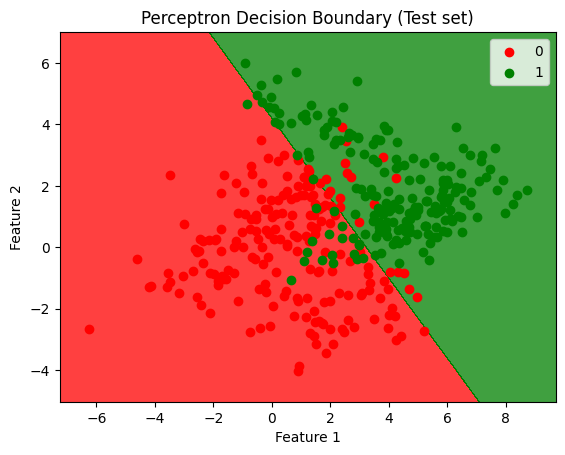

In [4]:
from sklearn.svm import LinearSVC
import time

# create a linear SVM classifier
aLinearSVC = LinearSVC( C = 1, random_state=int(time.time()) )

# train the SVM classifier
aLinearSVC.fit(X_train, Y_train)

score_train = aLinearSVC.score(X_train, Y_train)
score_test = aLinearSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature1'].min()-1, stop= X_test['Feature1'].max()+1, step = 0.01), np.arange(start = X_test['Feature2'].min()-1, stop= X_test['Feature2'].max()+1, step = 0.01))
plt.contourf(X1, X2, aLinearSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Number of SVs: 11


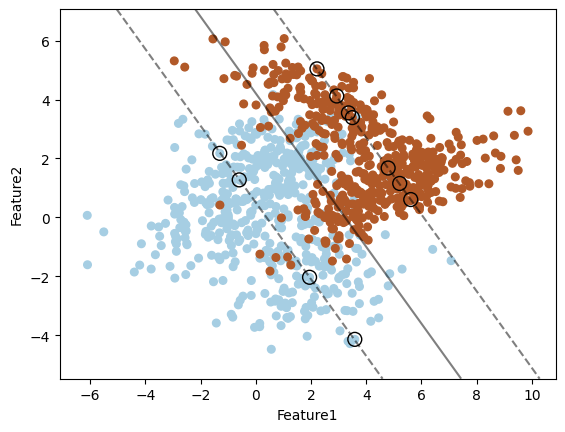

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

decisions = aLinearSVC.decision_function(X_train)
SV_inds = np.where(np.abs( np.abs(decisions) - 1) <= 1e-2)[0]
SVs = X_train.loc[SV_inds]
print( 'Number of SVs:', len( SV_inds ) )

plt.scatter(X_train['Feature1'], X_train['Feature2'], c=Y_train, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    aLinearSVC, 
    X_train,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

plt.scatter(
    SVs['Feature1'],
    SVs['Feature2'],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)



### 2. Kernel SVM

Training score = 0.918 ; Test score = 0.9175


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


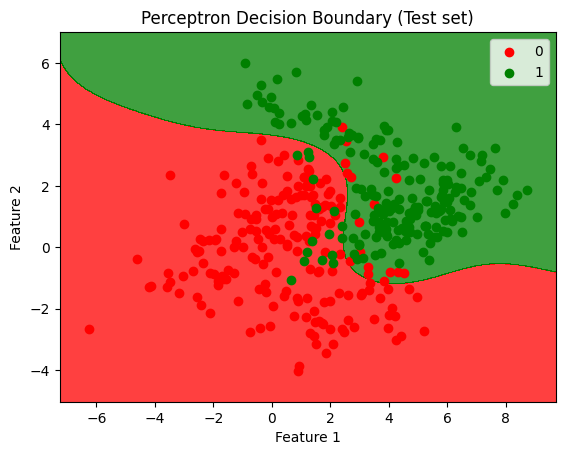

In [6]:
from sklearn.svm import SVC

# create a nonlinear SVM classifier
aSVC = SVC( C = 1, kernel='rbf', random_state=int(time.time()) )

# train the SVM classifier
aSVC.fit(X_train, Y_train)

score_train = aSVC.score(X_train, Y_train)
score_test = aSVC.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature1'].min()-1, stop= X_test['Feature1'].max()+1, step = 0.01), np.arange(start = X_test['Feature2'].min()-1, stop= X_test['Feature2'].max()+1, step = 0.01))
plt.contourf(X1, X2, aSVC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
X_test

,Feature1,Feature2
0,2.147903,1.040330
1,2.986226,0.825065
2,-1.630647,2.341028
3,1.633159,2.085376
4,-0.942783,1.799462
...,...,...
395,4.187081,1.406149
396,0.068813,4.526591
397,1.781840,3.656817
398,3.446155,3.348854


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

SVs = aSVC.support_vectors_
print( 'Number of SVs:', len( SV_inds ) )

plt.scatter(X_train['Feature1'], X_train['Feature2'], c=Y_train, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    aSVC, 
    X_train,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

plt.scatter(
    SVs[:, 0],
    SVs[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

In [ ]:
# If the above visualization does not work, use this one.
X1, X2 = np.meshgrid(np.arange(start = X_train['Feature1'].min()-1, stop= X_train['Feature1'].max()+1, step = 0.1), np.arange(start = X_train['Feature2'].min()-1, stop= X_train['Feature2'].max()+1, step = 0.1))
grid = np.vstack([X1.ravel(), X2.ravel()]).T
z = aSVC.decision_function(grid).reshape( X1.shape )
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_train['Feature1'][Y_train==j], X_train['Feature2'][Y_train==j], color=colors[i], label = j)
plt.contourf(X1, X2, z, colors='k', levels=[-1, 0, 1], alpha=0.1, linestyles=['--', '-', '--'])

SVs = aSVC.support_vectors_
plt.scatter( SVs[:, 0], SVs[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k" )
plt.show()
fig = plt.gcf()
fig.set_size_inches(30, 16)

### 3. Support Vector Regression

In [ ]:
# simulate a simple dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(seed=int(time.time())) 

n = 300
x_train = np.random.uniform(0, 2*np.pi, n)
x_train = np.sort( x_train )
y_train = 2*np.sin( x_train ) + np.random.normal(size=n)

x_test = np.random.uniform(0, 2*np.pi, n)
x_test = np.sort( x_test )
y_test = 2*np.sin( x_test ) + np.random.normal(size=n)

plt.plot(x_train, 2*np.sin(x_train), color = 'black', label = 'Actual Function', linewidth=3)
plt.scatter(x_train, y_train, color = 'red', marker='.', label = 'Training Samples', linewidth=3)

plt.scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Samples', linewidth=3)
plt.legend(fontsize = 12)
plt.title( 'Simulated Data for K-NN Regression' )

In [ ]:
from sklearn.svm import SVR
from sklearn import tree

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

aSVR = SVR(C=1.0)
aSVR.fit( x_train.reshape(-1, 1), y_train )

y_pred_by_tree = aSVR.predict( x_test.reshape(-1, 1) )

axs[0].scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Groundtruth (with Noise)', linewidth=3)
axs[0].scatter(x_test, y_pred_by_tree, color = 'blue', marker='o', label = 'Test Prediction', linewidth=3)
axs[0].plot(x_test, 2*np.sin(x_test), color = 'red', label = 'Actual Function', linewidth=3)
axs[0].legend(fontsize = 12)
rmse = np.sqrt( np.mean( (y_pred_by_tree - y_test) ** 2 ) )
axs[0].set_title( 'SVR: RMSE =' + str(rmse) )


# Compare with Tree Regressor
aTreeRegressor = tree.DecisionTreeRegressor()
aTreeRegressor = aTreeRegressor.fit( x_train.reshape(-1, 1), y_train )
y_pred_by_tree = aTreeRegressor.predict( x_test.reshape(-1, 1) )

axs[1].scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Groundtruth', linewidth=3)
axs[1].scatter(x_test, y_pred_by_tree, color = 'blue', marker='o', label = 'Test Prediction', linewidth=3)
axs[1].plot(x_test, 2*np.sin(x_test), color = 'red', label = 'Actual Function', linewidth=3)
axs[1].legend(fontsize = 12)

rmse = np.sqrt( np.mean( (y_pred_by_tree - y_test) ** 2 ) )
temp = axs[1].set_title( 'Tree Regressor: RMSE =' + str(rmse) )
